Feature selection for Machine learning project.
Project title: Substance use disorder and sociodemographic factors as predictors of other mental health disorders.
Authors:     
Ana Carmona, M.D
Lafouet Kevin Yemelong, BSN
 Swaikshya Nepal, M.
 Surekha Dhulipalla, Pharm.D 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_stata("mhcd.dta")
df

,YEAR,AGE,EDUC,ETHNIC,RACE,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,IJSSERVICE,...,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID,SEX
0,2023,18-20 years,Missing/unknown/not collected/invalid,Other Hispanic or Latino origin,White,Not served in a state psychiatric hospital,Served in SMHA-funded/operated community-based...,Served in 'other psychiatric inpatient center',Not served in a residential treatment center,Not served by any institution under the justic...,...,Disorder not reported,Disorder not reported,Disorder not reported,Disorder not reported,Disorder not reported,Alabama,East South Central,South,2.023000e+10,Female
1,2023,21-24 years,12 (or GED),Not of Hispanic or Latino origin,Black or African American,Served in a state psychiatric hospital,Not served in SMHA-funded/operated community-b...,Not served in 'other psychiatric inpatient cen...,Not served in a residential treatment center,Not served by any institution under the justic...,...,Disorder not reported,Disorder not reported,Disorder reported,Disorder not reported,Disorder not reported,Alabama,East South Central,South,2.023000e+10,Female
2,2023,35-39 years,12 (or GED),Not of Hispanic or Latino origin,White,Served in a state psychiatric hospital,Served in SMHA-funded/operated community-based...,Not served in 'other psychiatric inpatient cen...,Not served in a residential treatment center,Not served by any institution under the justic...,...,Disorder not reported,Disorder not reported,Disorder reported,Disorder not reported,Disorder not reported,Alabama,East South Central,South,2.023000e+10,Female
3,2023,50-54 years,Missing/unknown/not collected/invalid,Other Hispanic or Latino origin,White,Not served in a state psychiatric hospital,Served in SMHA-funded/operated community-based...,Not served in 'other psychiatric inpatient cen...,Not served in a residential treatment center,Not served by any institution under the justic...,...,Disorder not reported,Disorder not reported,Disorder not reported,Disorder not reported,Disorder reported,Alabama,East South Central,South,2.023000e+10,Female
4,2023,15-17 years,9 to 11,Not of Hispanic or Latino origin,White,Served in a state psychiatric hospital,Served in SMHA-funded/operated community-based...,Not served in 'other psychiatric inpatient cen...,Not served in a residential treatment center,Not served by any institution under the justic...,...,Disorder not reported,Disorder not reported,Disorder not reported,Disorder not reported,Disorder not reported,Alabama,East South Central,South,2.023000e+10,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035636,2023,30-34 years,9 to 11,Mexican,Some other race alone/two or more races,Not served in a state psychiatric hospital,Served in SMHA-funded/operated community-based...,Not served in 'other psychiatric inpatient cen...,Served in a residential treatment center,Not served by any institution under the justic...,...,Disorder not reported,Disorder not reported,Disorder reported,Disorder not reported,Disorder not reported,Puerto Rico,Other jurisdictions,Other jurisdictions,2.023704e+10,Male
7035637,2023,60-64 years,Missing/unknown/not collected/invalid,Not of Hispanic or Latino origin,White,Served in a state psychiatric hospital,Not served in SMHA-funded/operated community-b...,Not served in 'other psychiatric inpatient cen...,Served in a residential treatment center,Not served by any institution under the justic...,...,Disorder not reported,Disorder not reported,Disorder reported,Disorder not reported,Disorder not reported,Puerto Rico,Other jurisdictions,Other jurisdictions,2.023704e+10,Female
7035638,2023,12-14 years,0 to 8,Other Hispanic or Latino origin,White,Not served in a state psychiatric hospital,Not served in SMHA-funded/operated community-b...,Not served in 'other psychiatric inpatient cen...,Served in a residential treatment center,Not served by any institution under the justic...,...,Disorder n

In [2]:
selected_cols = [
    'AGE', 'RACE', 'SAP', 'MH1',
]
df_selected = df[selected_cols].copy()
df_selected

# Replace invalid labels with NaN
invalid_labels = [
    "Missing/unknown/not collected/invalid",
    "Missing/unknown/not collected/invalid/no or deferred diagnosis",
    "Disorder not reported"
]

for col in df_selected.columns:
    df_selected[col] = df_selected[col].astype(str).replace(invalid_labels, np.nan)

# Convert AGE to numeric midpoint
age_map = {
    "0 to 2 years": 1, "3 to 5 years": 4, "6 to 8 years": 7,
    "9 to 11 years": 10, "12 to 14 years": 13, "15 to 17 years": 16,
    "18-20 years": 19, "21-24 years": 22, "25-29 years": 27,
    "30-34 years": 32, "35-39 years": 37, "40-44 years": 42,
    "45-49 years": 47, "50-54 years": 52, "55-59 years": 57,
    "60-64 years": 62, "65 years and older": 70
}

df_selected["AGE_NUMERIC"] = df_selected["AGE"].map(age_map)

# Drop rows with missing values in any of the selected columns
df_cleaned = df_selected.dropna(subset=["AGE_NUMERIC", 'AGE', 'RACE', 'SAP', 'MH1']).reset_index(drop=True)
df_cleaned.head(20)

,AGE,RACE,SAP,MH1,AGE_NUMERIC
0,18-20 years,White,Yes,Bipolar disorders,19.0
1,21-24 years,Black or African American,No,Schizophrenia or other psychotic disorders,22.0
2,35-39 years,White,Yes,Schizophrenia or other psychotic disorders,37.0
3,60-64 years,Some other race alone/two or more races,Yes,Bipolar disorders,62.0
4,25-29 years,White,Yes,Schizophrenia or other psychotic disorders,27.0
5,18-20 years,White,No,Bipolar disorders,19.0
6,18-20 years,Some other race alone/two or more races,Yes,Bipolar disorders,19.0
7,60-64 years,Asian,No,Bipolar disorders,62.0
8,35-39 years,Some other race alone/two or more races,Yes,Schizophrenia or other psychotic disorders,37.0
9,50-54 years,White,No,Schizophrenia or other psychotic disorders,52.0


C:\Users\anabe\AppData\Local\Temp\ipykernel_10052\891053979.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y="MH1", order=df_cleaned["MH1"].value_counts().index, palette="plasma")


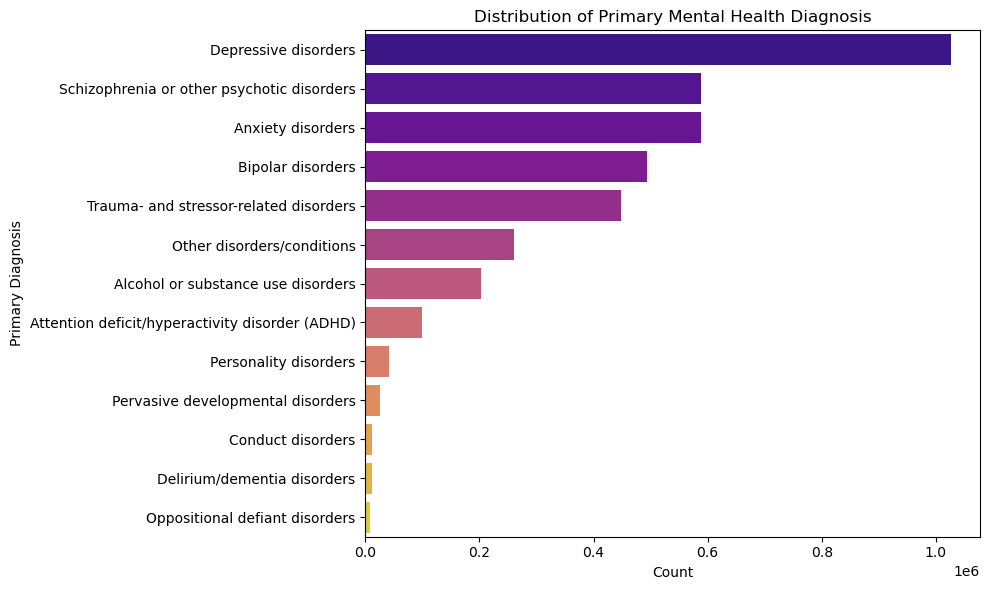

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, y="MH1", order=df_cleaned["MH1"].value_counts().index, palette="plasma")
plt.title("Distribution of Primary Mental Health Diagnosis")
plt.xlabel("Count")
plt.ylabel("Primary Diagnosis")
plt.tight_layout()
plt.show() 

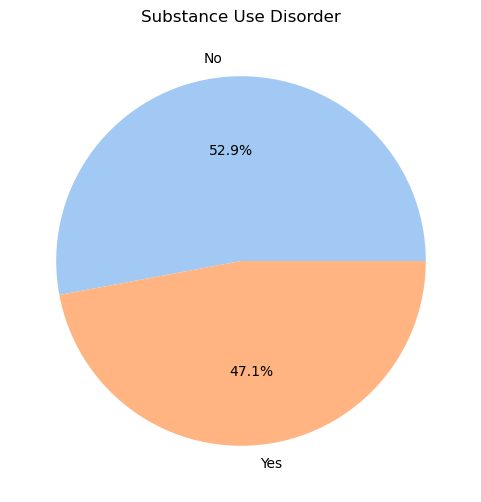

In [4]:
df_cleaned["SAP"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6, 6), colors=sns.color_palette("pastel"))
plt.title("Substance Use Disorder")
plt.ylabel("")
plt.show()

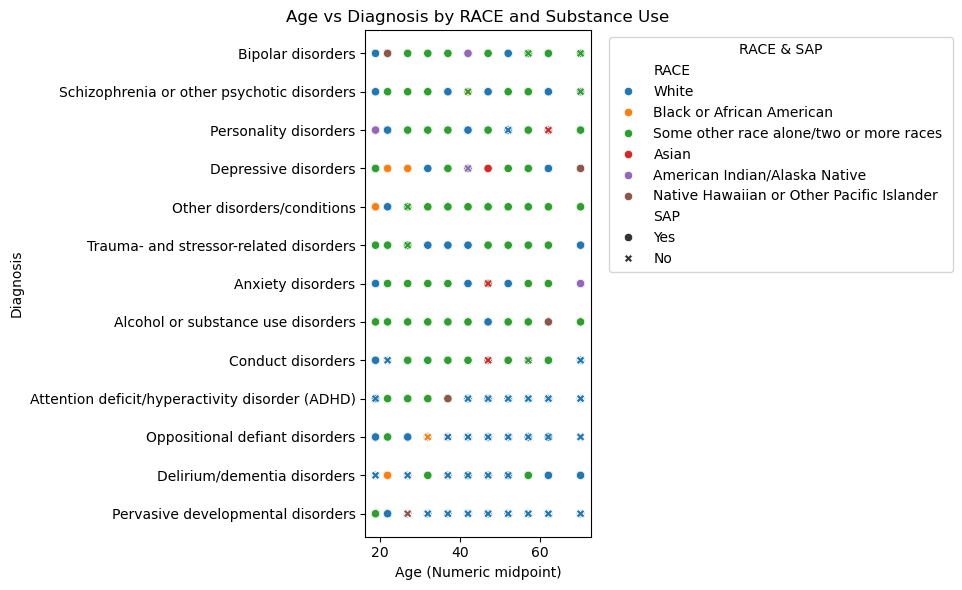

In [5]:
#Scatter plot for all the features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="AGE_NUMERIC", y="MH1", hue="RACE", style="SAP")
plt.title("Age vs Diagnosis by RACE and Substance Use")
plt.xlabel("Age (Numeric midpoint)")
plt.ylabel("Diagnosis")
plt.legend(title="RACE & SAP", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\anabe\AppData\Local\Temp\ipykernel_10052\2724369075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="SAP", y="AGE_NUMERIC", palette="Set3")


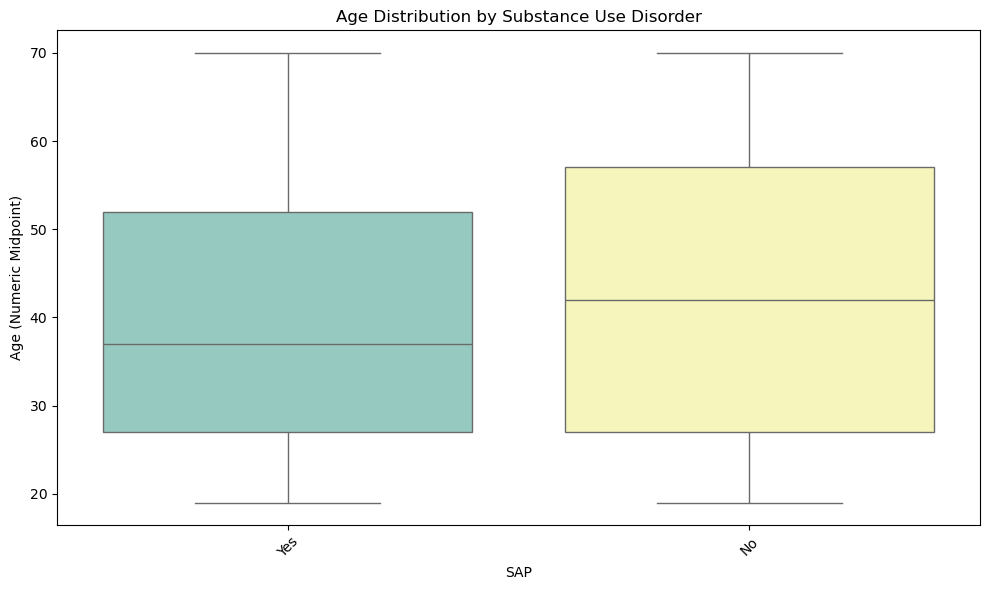

In [6]:
#Box Plot of Age by Substance use 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x="SAP", y="AGE_NUMERIC", palette="Set3")
plt.title("Age Distribution by Substance Use Disorder")
plt.xlabel("SAP")
plt.ylabel("Age (Numeric Midpoint)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


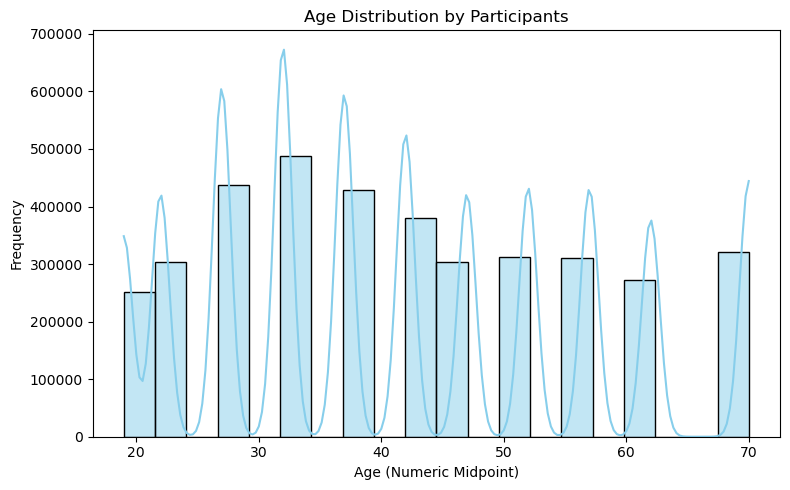

In [7]:
#Histogram of Age_Numeric
plt.figure(figsize=(8, 5))
sns.histplot(data=df_cleaned, x="AGE_NUMERIC", bins=20, kde=True , color="Skyblue")
plt.title("Age Distribution by Participants")
plt.xlabel("Age (Numeric Midpoint)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()